<a href="https://colab.research.google.com/github/Syd001978/CAPSTONE-BengkelKoding-a112214247/blob/main/Preprocessing_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load file CSV dari folder di Google Drive
file_path = '/content/drive/MyDrive/capstone_bengkod/ObesityDataSet.csv'
df = pd.read_csv(file_path)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## Replace '?' ke NaN

In [110]:
# Langkah 1: Menstandarkan nilai missing
# Beberapa nilai hilang direpresentasikan sebagai simbol '?', kita ganti jadi np.nan

df.replace('?', np.nan, inplace=True)

# Cek jumlah missing values setelah normalisasi simbol '?'
missing_counts = df.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_counts)


Jumlah missing value per kolom:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2089 non-null   object
 1   Gender                          2089 non-null   object
 2   Height                          2089 non-null   object
 3   Weight                          2092 non-null   object
 4   CALC                            2091 non-null   object
 5   FAVC                            2089 non-null   object
 6   FCVC                            2093 non-null   object
 7   NCP                             2089 non-null   object
 8   SCC                             2093 non-null   object
 9   SMOKE                           2098 non-null   object
 10  CH2O                            2096 non-null   object
 11  family_history_with_overweight  2088 non-null   object
 12  FAF                             2092 non-null   

## Konversi ke numerik

In [112]:
# Daftar kolom yang seharusnya numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi ke float, dan otomatis ubah yang tidak bisa jadi NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [113]:
df['NCP'] = df['NCP'].round()
print(df['NCP'].value_counts())

NCP
3.0     1448
1.0      309
2.0      173
4.0      149
11.0       5
12.0       4
10.0       1
Name: count, dtype: int64


## Imputasi missing value


In [114]:
# Daftar kolom numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Imputasi missing value dengan mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Ambil kolom selain numerik dan label sebagai kategorikal
cat_cols = [col for col in df.columns if col not in num_cols + ['NObeyesdad']]

# Imputasi missing value dengan modus
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Cek apakah semua missing value sudah diatasi
print(df.isnull().sum())

# Tampilkan beberapa baris untuk melihat data yang telah dibersihkan
df.info()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height             

## outlier

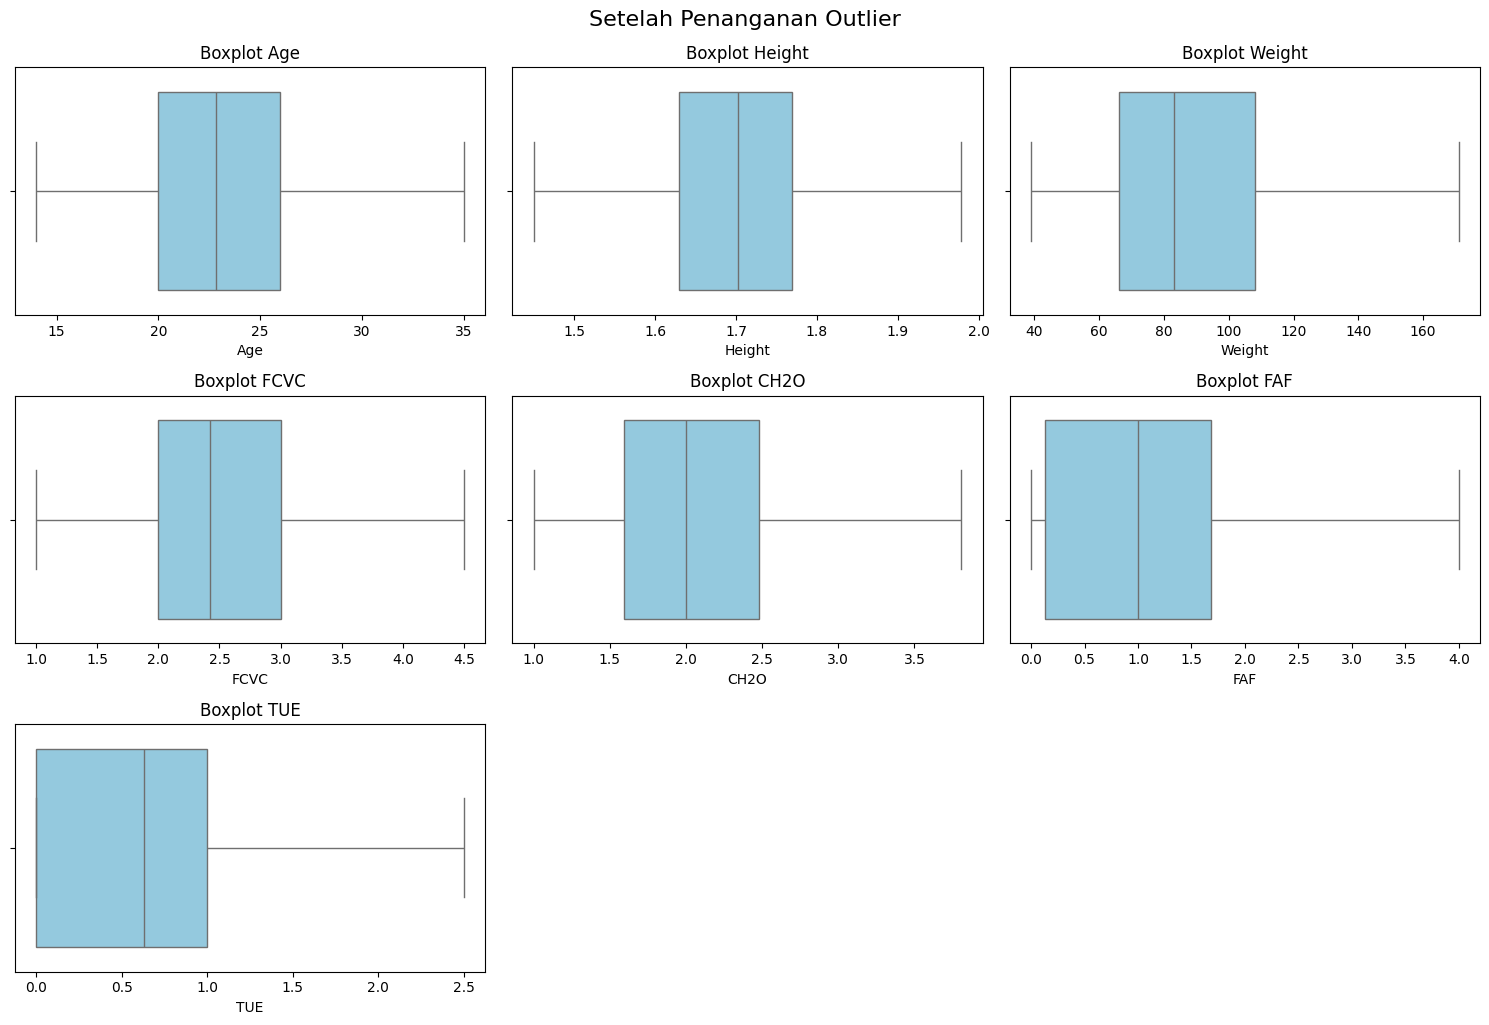

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [115]:
# 3. Tangani outlier (gunakan IQR method untuk kolom numerik)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Set ukuran figure
plt.figure(figsize=(15, 10))

# Buat boxplot horizontal untuk setiap fitur numerik
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)  # 3 baris, 3 kolom (karena ada 8 fitur)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot {col}")
    plt.tight_layout()

plt.suptitle("Setelah Penanganan Outlier", fontsize=16, y=1.02)
plt.show()

df.head()



## Encoding biner

In [116]:
from sklearn.preprocessing import LabelEncoder

# family_history_with_overweight
df.rename(columns={'family_history_with_overweight': 'fam_history'}, inplace=True)

binary_cols = ['Gender', 'fam_history', 'FAVC', 'SMOKE', 'SCC']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

for col in binary_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())


Value counts for Gender:
Gender
1    1078
0    1033
Name: count, dtype: int64
Value counts for fam_history:
fam_history
1    1728
0     383
Name: count, dtype: int64
Value counts for FAVC:
FAVC
1    1866
0     245
Name: count, dtype: int64
Value counts for SMOKE:
SMOKE
0    2067
1      44
Name: count, dtype: int64
Value counts for SCC:
SCC
0    2015
1      96
Name: count, dtype: int64


## Encodding non biner

In [117]:
mapping_mtrans = {
    'Public_Transportation': 1,
    'Automobile': 2,
    'Walking': 3,
    'Motorbike': 4,
    'Bike': 5
}
df['MTRANS'] = df['MTRANS'].map(mapping_mtrans)

le = LabelEncoder()
for col in ['CAEC', 'CALC']:
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,fam_history,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,1,Normal_Weight
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,1,Normal_Weight
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,1,Normal_Weight
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,3,Overweight_Level_I
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,1,Overweight_Level_II


## Encode Label

In [121]:
from sklearn.preprocessing import LabelEncoder

# Encode target label
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['NObeyesdad'])

# Cek mapping label
mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print("Mapping label asli ke encoded:", mapping)


Mapping label asli ke encoded: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}


## Split Data

In [122]:
from sklearn.model_selection import train_test_split

X = df.drop('NObeyesdad', axis=1)
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## scalling

In [123]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()

# Fit di train, transform train & test
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


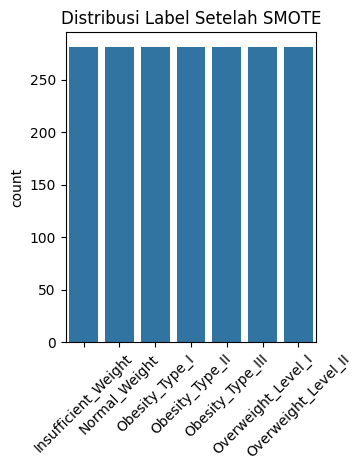

In [124]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Sesudah SMOTE
plt.subplot(1,2,2)
sns.countplot(x=y_train_res)
plt.title('Distribusi Label Setelah SMOTE')
plt.xticks(ticks=range(len(mapping)), labels=le_target.classes_, rotation=45)

plt.tight_layout()
plt.show()


In [126]:
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f"\n🧠 Model: {name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    # Decode untuk laporan
    y_test_decoded = le_target.inverse_transform(y_test)
    y_pred_decoded = le_target.inverse_transform(y_pred)

    print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred_decoded):.4f}")
    print(classification_report(y_test_decoded, y_pred_decoded))



🧠 Model: Random Forest
Accuracy: 0.9385
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.81      0.97      0.88        58
     Obesity_Type_I       0.91      0.97      0.94        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.93      0.86      0.89        58
Overweight_Level_II       0.98      0.86      0.92        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423


🧠 Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9409
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.93        54
      Normal_Weight       0.84      0.93      0.89        58
     Obesity_Type_I       0.97      0.94      0.96        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.86      0.88      0.87        58
Overweight_Level_II       0.98      0.93      0.96        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423


🧠 Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of da